In [8]:
# Let's begin!

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import calendar

In [9]:
# Importing dataset
df = pd.read_excel('data/Incidents_MIS_May2019-m.xlsx')

In [10]:
# PRE-CLEANING DATASET
# Drop useless columns
df_init = df.drop(columns=[
                 'Group Name',
                 'Incident ID', 
                 'State how the incident was detected', 
                 'Reporting Currency',
                 'Gross Amount in Reporting Currency',
                 'Recovery Amount in Reporting Currency',
                 'Net Loss - Reporting Currency', 
                 'Transaction Currency',
                 'Gross Amount in Transaction Currency',
                 'Recovery Amount in Transaction Currency',
                 'Net Loss - Transaction Currency', 
                 'Actual Currency',
                 'Gross Amount in Actual Currency', 
                 'Incident Gross Amount' , 
                 'Eff GL Account No.', 
                 'Eff GL Reference', 
                 'Rcvy GL Reference', 
                 'Incident Owner'
                 ])

# Getting only APPROVED or CLOSED incidents
df_init = df_init[(df_init['Incident Status'] == 'CLOSED') | (df_init['Incident Status'] == 'APPROVED')]

# DateTime Operations
df_init['Creation Year'] = pd.DatetimeIndex(df_init['Creation date']).year
df_init['Creation Month'] = pd.DatetimeIndex(df_init['Creation date']).month

# Removing 2019 year records as the it is the current year
df_init = df_init[df_init['Creation Year'] != 2019]

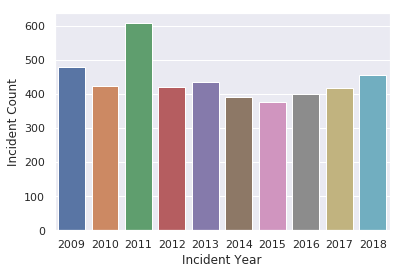

In [11]:
# Visualizing Data Incidents V/S Year
incidentGroupedByYear = pd.DataFrame(df_init.groupby('Creation Year').agg('count')['Creation date'])
incidentGroupedByYear.reset_index(inplace=True)
incidentGroupedByYear.rename(columns={'Creation date': 'Incident Count', 'Creation Year': 'Incident Year'}, inplace=True)
sns.set()
sns.barplot(x="Incident Year", y="Incident Count", data=incidentGroupedByYear);

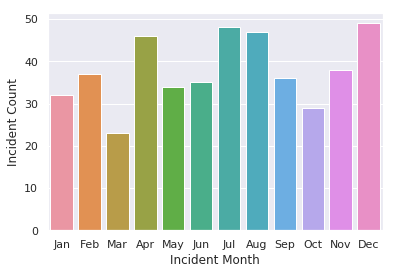

In [12]:
# Visualizing for the year of 2018
incidentsFor2018 = df_init[df_init['Creation Year'] == 2018]
incidentsGroupedByMonth = pd.DataFrame(incidentsFor2018.groupby('Creation Month').agg('count')['Creation date'])
incidentsGroupedByMonth.reset_index(inplace=True)
incidentsGroupedByMonth.rename(columns={'Creation Month': 'Incident Month', 'Creation date': 'Incident Count'}, inplace=True)
incidentsGroupedByMonth['Incident Month'] = incidentsGroupedByMonth['Incident Month'].apply(lambda x: calendar.month_abbr[x])
sns.set()
sns.barplot(x="Incident Month", y="Incident Count", data=incidentsGroupedByMonth);